In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [4]:
# read data
with open('X_train.pkl', 'rb') as f:
    Xtrain = pickle.load(f)

with open('X_test.pkl', 'rb') as f:
    Xtest = pickle.load(f)

with open('Y_train.pkl', 'rb') as f:
    Ytrain = pickle.load(f)

with open('Fx_test.pkl', 'rb') as f:
    Ytest = pickle.load(f)

In [5]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(20, 400)
(20, 400)
(80,)
(80,)


In [6]:
def linearPlot(x, y, title):
  plt.scatter(x, y)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(title)
  plt.show()

In [7]:
def polynomialPlot(x, y, yhat, title, index):
  plt.figure(index)
  plt.scatter(x, y, label = 'Actual')
  plt.legend()
  plt.scatter(x, yhat, label = 'Predicted')
  plt.legend()
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title(title)
  plt.show(index)

In [8]:
def trainingOnAllFolds(Xfolds, Yfolds, poly):

  models = []
  length = len(Xfolds)

  for i in range(length):

    x = poly.fit_transform(Xfolds[i].reshape(-1,1))

    model = LinearRegression()
    model.fit(x, Yfolds[i])

    models.append(model)
      
  return models

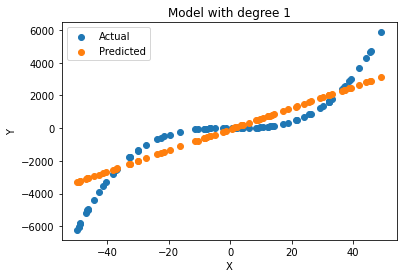

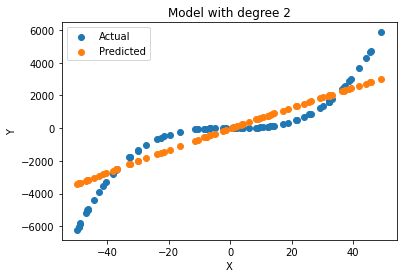

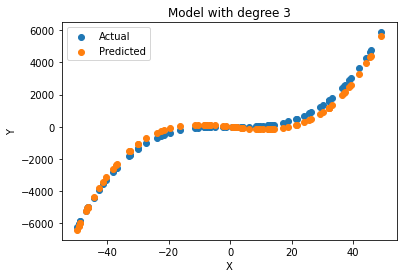

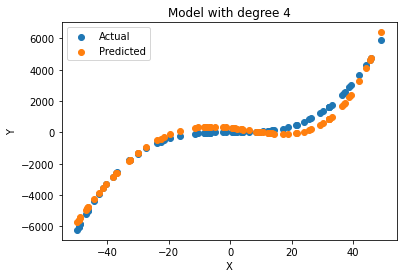

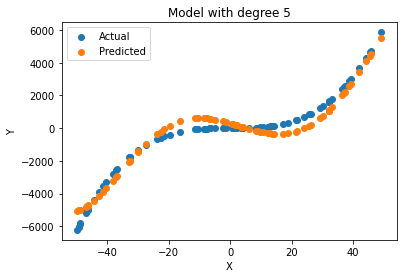

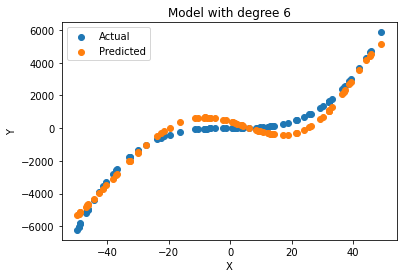

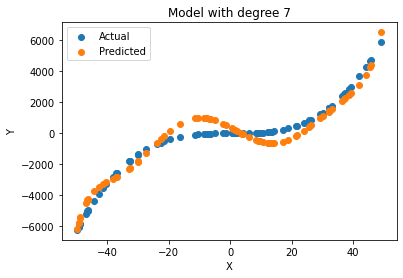

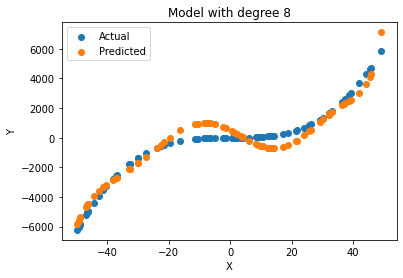

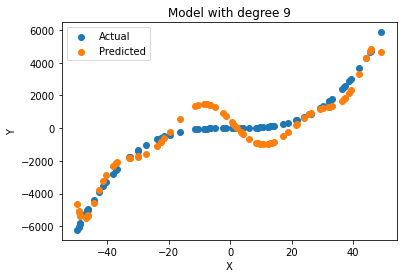

In [9]:
Xtest = Xtest.reshape(-1, 1)
Ytest = Ytest.reshape(-1, 1)

score_df = pd.DataFrame(columns=['Degree', 'Bias', 'Bias Square', 'Variance', 'MSE', 'Irreducible Error', 'Error'])
all_degree = []
all_bias = []
all_bias_square = []
all_variance = []
all_mse = []
all_irreducible_error = []
all_error = []

for degree in range(1, 10):
 # create the polynomial function with degree from 1 to 9
  poly = PolynomialFeatures(degree)

  # create a list of models with this polynomial function
  models = trainingOnAllFolds(Xtrain, Ytrain, poly)

  df = pd.DataFrame(Ytest, columns=['Actual'])
  # check the models with the Xtest data to get the Yhat
  for (index, model) in enumerate(models):
    # transform Xtest before prediction so Xtest fit the dimensions of polynomial function
    XtestTransformed = poly.fit_transform(Xtest)
    # predict Yhat
    Yhat = model.predict(XtestTransformed)
    # tabular models data
    df['Model ' + str(index + 1)] = Yhat

  all_degree.append(degree)

  # plot the last model
  title = 'Model with degree ' + str(degree)
  polynomialPlot(Xtest, Ytest, Yhat, title, degree)

  actual = np.array(df['Actual']).reshape(-1, 1)
  # 10 columns of 10 models of 9 different datasets
  predictions = np.array(df.iloc[:, 1:])

  # average of 10 predictions over 10 models
  df['Prediction AVG'] = np.mean(predictions, axis = 1)
  predictionAVG = np.array(df['Prediction AVG']).reshape(-1, 1)

  # difference between prediction (500,9) and actual (500,1) values
  diff =  predictions - actual
  # ABS Bias
  bias = np.mean(np.mean(np.abs(diff), axis = 1))
  # Square Bias
  bias_square = np.mean(np.mean(np.power(diff, 2), axis = 1))
  # Variance
  variance = np.mean(np.power(predictions - predictionAVG, 2))
  # Mean Square Error
  mse = np.mean(np.power(actual - predictionAVG, 2))
  # Irreducible Error
  irreducible_error = mse - (bias_square + variance)
  # Error
  error = bias_square + variance + mse
  # append to lists
  all_bias.append(bias)
  all_bias_square.append(bias_square)
  all_variance.append(variance)
  all_mse.append(mse)
  all_irreducible_error.append(irreducible_error)
  all_error.append(error)

score_df['Degree'] = all_degree
score_df['Bias'] = all_bias
score_df['Bias Square'] = all_bias_square
score_df['Variance'] = all_variance
score_df['MSE'] = all_mse
score_df['Irreducible Error'] = all_irreducible_error
score_df['Error'] = all_error

In [10]:
score_df

,Degree,Bias,Bias Square,Variance,MSE,Irreducible Error,Error
0,1,838.417801,1.069774e+06,70545.489146,999228.396872,-141090.978292,2.139548e+06
1,2,841.983375,1.080490e+06,125870.855549,954619.273794,-251741.711098,2.160980e+06
2,3,302.023878,1.594635e+05,150073.739546,9389.730117,-300147.479093,3.189269e+05
3,4,355.336435,2.231431e+05,212235.708325,10907.348134,-424471.416651,4.462861e+05
4,5,398.466692,2.857277e+05,276388.480255,9339.194291,-552776.960509,5.714553e+05
5,6,432.478291,3.271121e+05,316863.498437,10248.585941,-633726.996875,6.542242e+05
6,7,454.807819,3.678463e+05,357510.984757,10335.275862,-715021.969515,7.356925e+05
7,8,478.422783,4.144361e+05,404286.670686,10149.419244,-808573.341372,8.288722e+05
8,9,496.808156,4.699479e+05,459132.378372,10815.487037,-918264.756745,9.398957e+05


In [11]:
def customPlot(col, title):
  plt.plot(score_df['Degree'], score_df[col], color = 'green')
  plt.title(title)
  plt.xlabel('Degree') 
  plt.ylabel(col)
  plt.legend([col])
  plt.show()

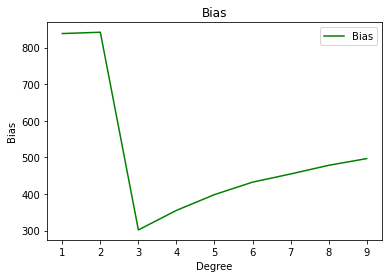

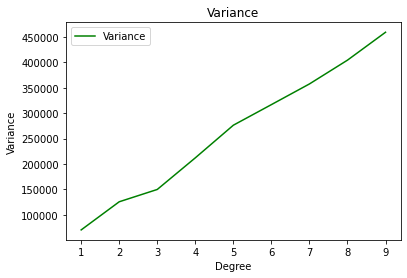

In [12]:
customPlot('Bias', 'Bias')
customPlot('Variance', 'Variance')

# Report
As Shown in the plots above:
1.   The Variance increases.
2.   The minimum Bias is on degree 3.

So the trade off between the bias and variance is Degree d = 3.

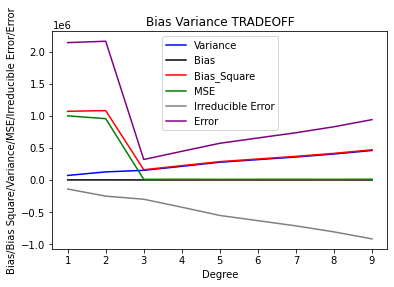

In [13]:
plt.plot(score_df['Degree'], score_df['Variance'], color = 'blue')
plt.plot(score_df['Degree'], score_df['Bias'], color = 'black')
plt.plot(score_df['Degree'], score_df['Bias Square'], color = 'red')
plt.plot(score_df['Degree'], score_df['MSE'], color = 'green')
plt.plot(score_df['Degree'], score_df['Irreducible Error'], color = 'gray')
plt.plot(score_df['Degree'], score_df['Error'], color = 'purple')
plt.title('Bias Variance TRADEOFF')
plt.xlabel('Degree') 
plt.ylabel('Bias/Bias Square/Variance/MSE/Irreducible Error/Error')
plt.legend(['Variance', 'Bias', 'Bias_Square', 'MSE', 'Irreducible Error', 'Error'])
plt.show()